In [1]:
import pandas as pd
import numpy as np

## The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images

### training 80 instances, half 1s,half 0s.

In [2]:
col = ['target','F1R','F1S','F2R','F2S','F3R','F3S','F4R','F4S','F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R','F10S',
      'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S',
      'F19R','F19S','F20R','F20S','F21R','F21S','F22R','F22S']

train = pd.read_csv('SPECTF_train.csv', header=None, low_memory=False,names = col,)
train.shape



(80, 45)

## testing 187 instance,15 0s, 172 1s

In [3]:
test = pd.read_csv('SPECTF_test.csv', header=None, low_memory=False,names = col)
test.head(),test.shape

(   target  F1R  F1S  F2R  F2S  F3R  F3S  F4R  F4S  F5R  ...   F18R  F18S  \
 0       1   67   68   73   78   65   63   67   60   63  ...     61    56   
 1       1   75   74   71   71   62   58   70   64   71  ...     66    62   
 2       1   83   64   66   67   67   74   74   72   64  ...     67    64   
 3       1   72   66   65   65   64   61   71   78   73  ...     69    68   
 4       1   62   60   69   61   63   63   70   68   70  ...     66    66   
 
    F19R  F19S  F20R  F20S  F21R  F21S  F22R  F22S  
 0    76    75    74    77    76    74    59    68  
 1    68    69    69    66    64    58    57    52  
 2    69    63    68    54    65    64    43    42  
 3    68    63    71    72    65    63    58    60  
 4    58    56    72    73    71    64    49    42  
 
 [5 rows x 45 columns], (187, 45))

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = train.corr()

Text(0.5, 1.0, 'correlation between features and target')

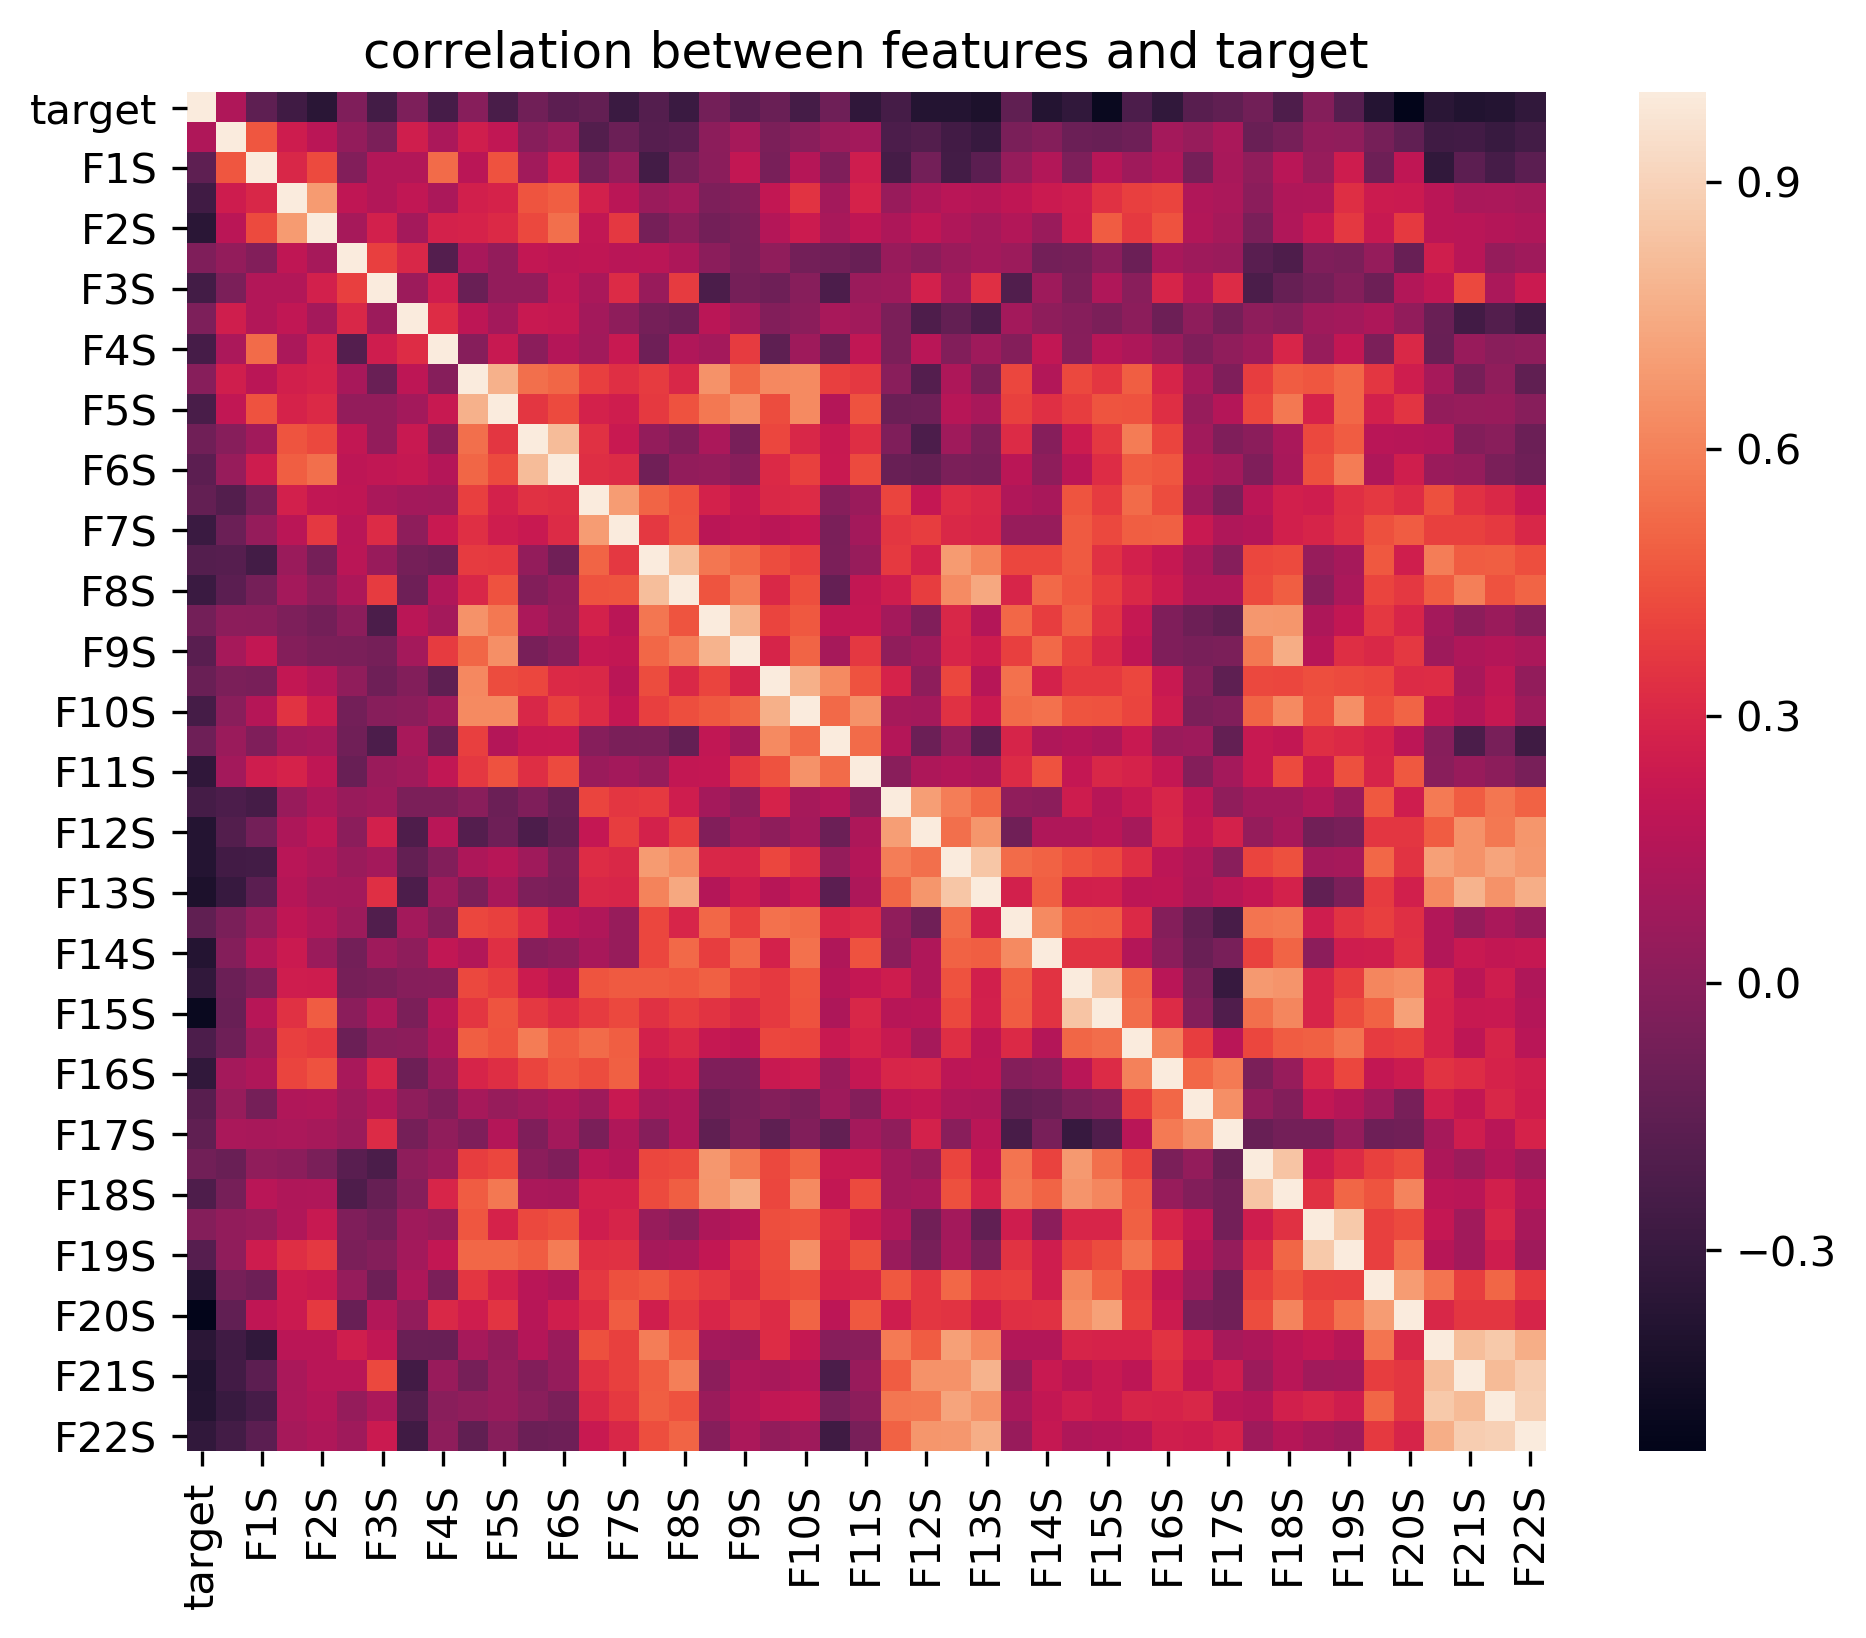

In [5]:
plt.figure(figsize=(8,6),dpi=300)
sns.heatmap(correlation,vmax=1,square=True)
plt.title('correlation between features and target')

## feature reduction

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Text(15, 0.9, '15')

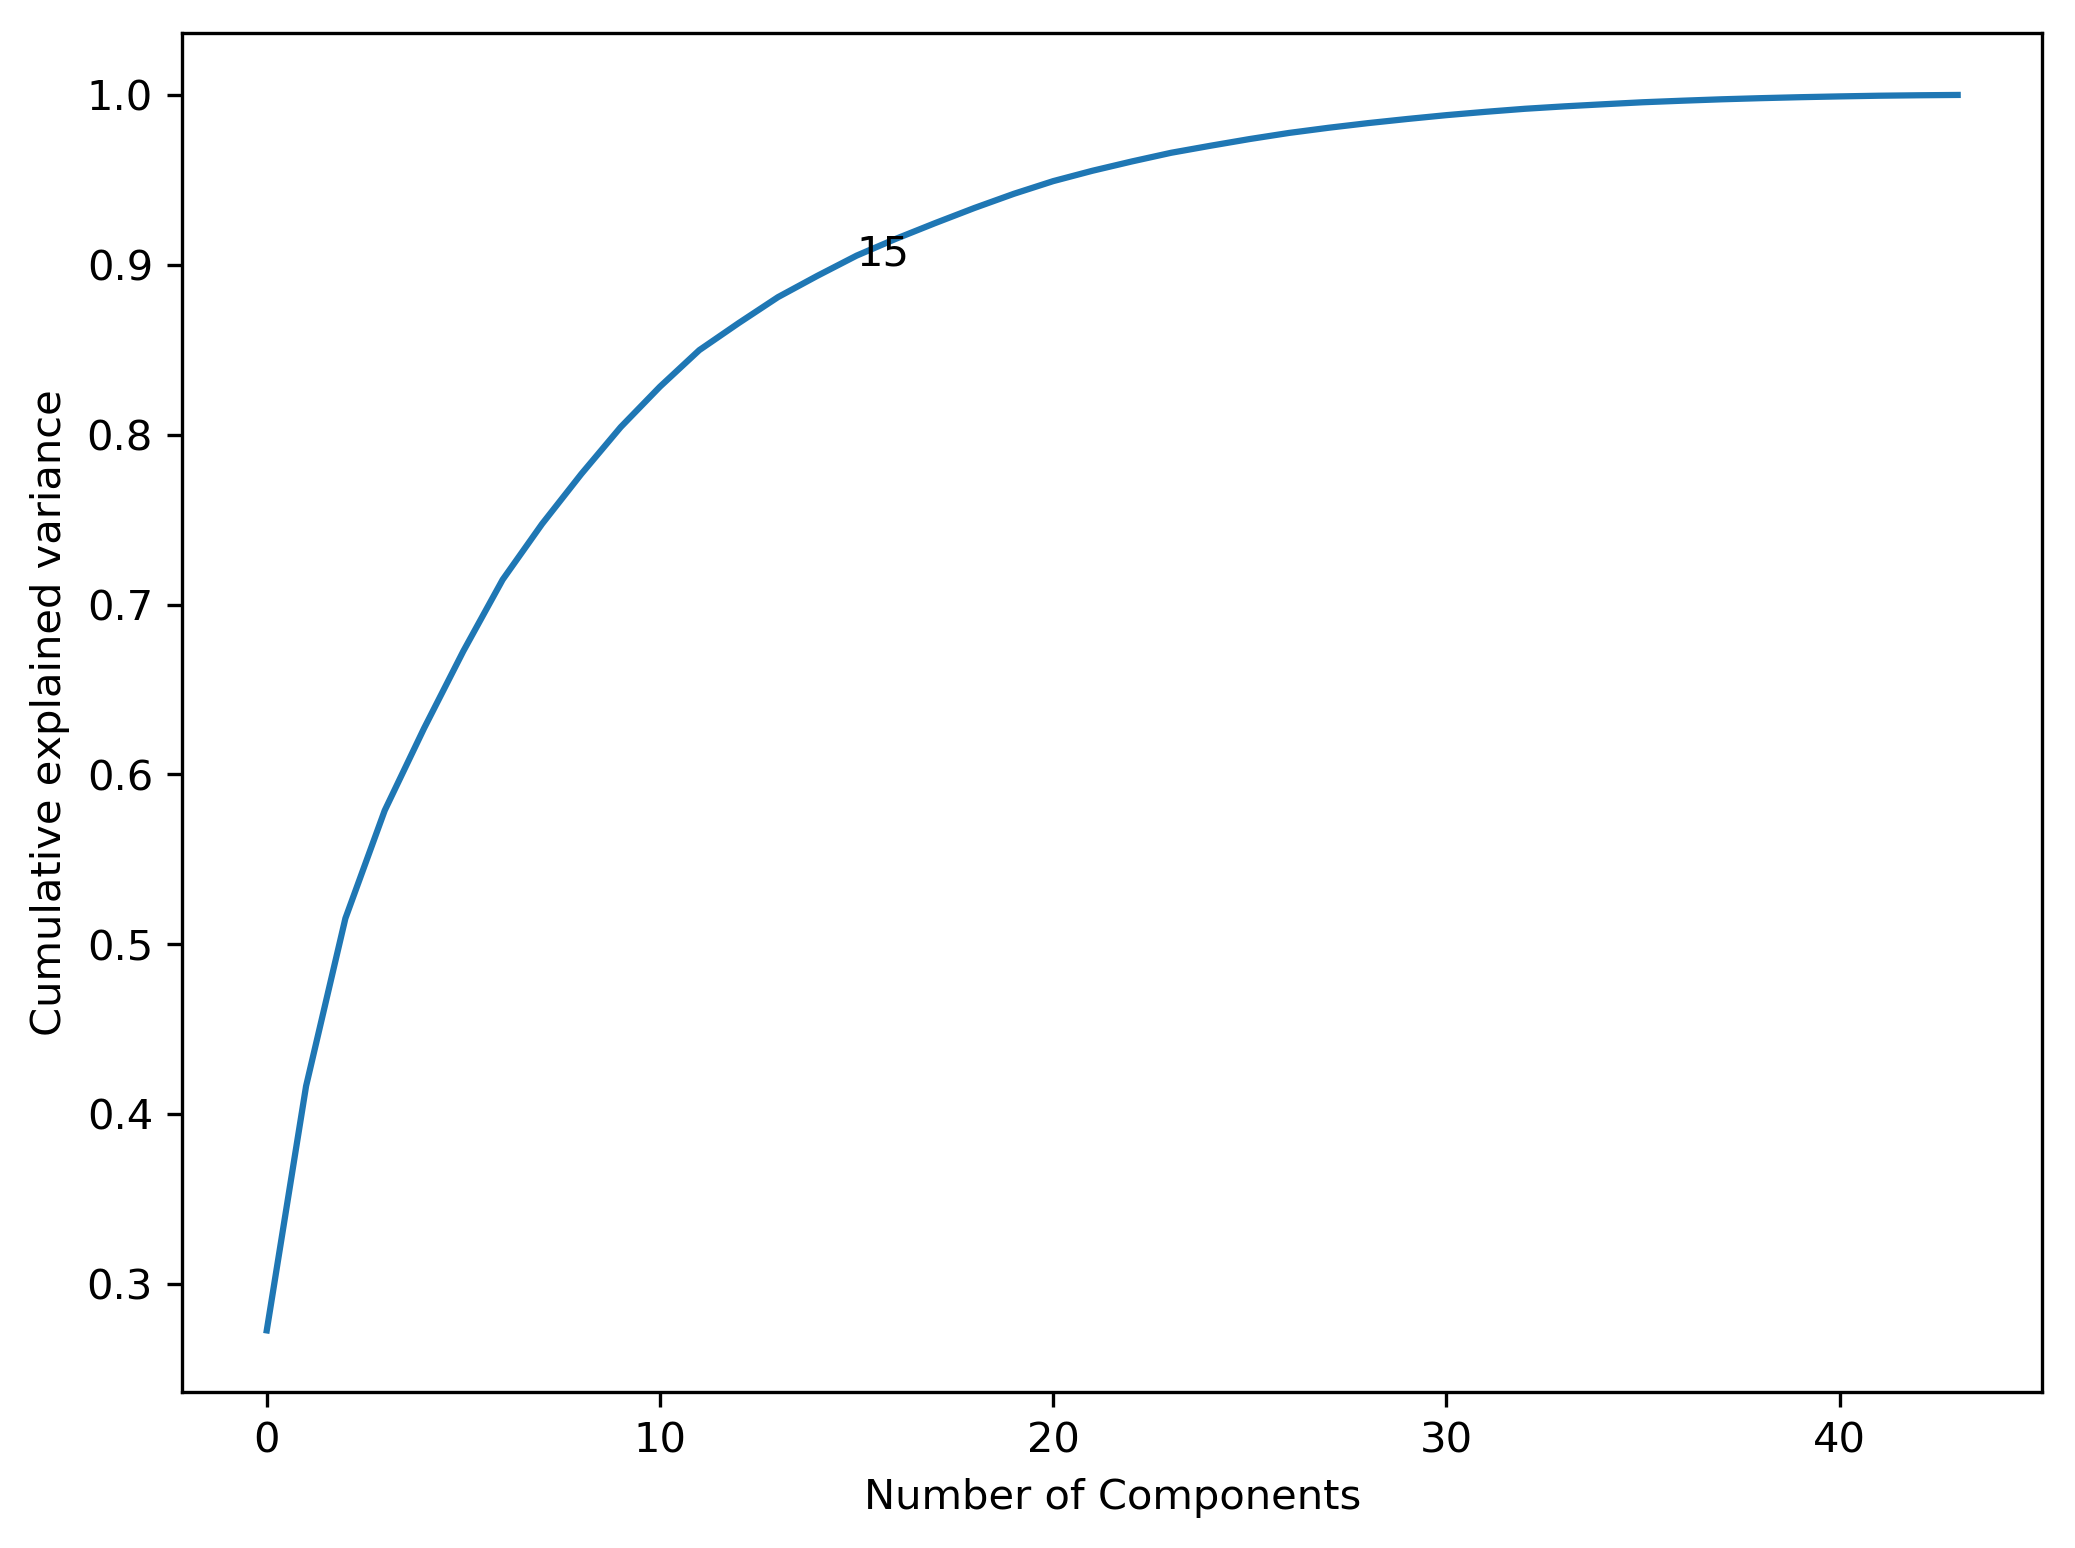

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
# z = (x - u) / s
y = train['target'].values
X = train.drop('target',axis = 1).values
X_std = scaler.fit_transform(X)
## PCA
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.figure(figsize=(8,6),dpi=300)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')
plt.annotate('15',xy = (15,0.9))

In [46]:
final_data=pca.fit_transform(X_std)

In [47]:
final_data[:5,:]

array([[ 1.15712649,  4.04094759, -0.85234602,  2.62139353, -1.11005746,
         1.01794091,  0.80576767, -0.85532899,  0.30579662, -0.03370415,
         1.16350459,  0.26959167,  0.43986533, -1.05374991, -0.52775093,
        -0.43496017,  0.22026975, -0.39616286, -0.1996024 , -1.16190378],
       [-2.13561808,  1.42286361,  0.85557974, -0.83039118, -1.59991079,
         0.95500465, -1.05500361,  0.54546793, -0.23307119,  0.95434908,
         0.60567792,  1.58533197,  0.0467725 ,  0.12984068, -0.16966534,
         0.65171215,  1.00436975, -1.55860123, -0.23856373, -0.02762929],
       [ 0.94908978, -4.55960379,  2.62674473,  1.44280636, -2.1037801 ,
        -0.04610274, -0.51698198, -0.48045106,  0.04941695, -1.19682628,
         1.14910585,  0.46513282,  0.79065906,  0.53364858,  0.79124159,
        -1.10320136, -0.07821306,  0.42317851, -0.60016142, -0.56347851],
       [ 0.78969205,  2.14694488, -1.43083207,  0.82651145,  1.90910036,
         1.10211237,  0.99239756, -1.01109529,  

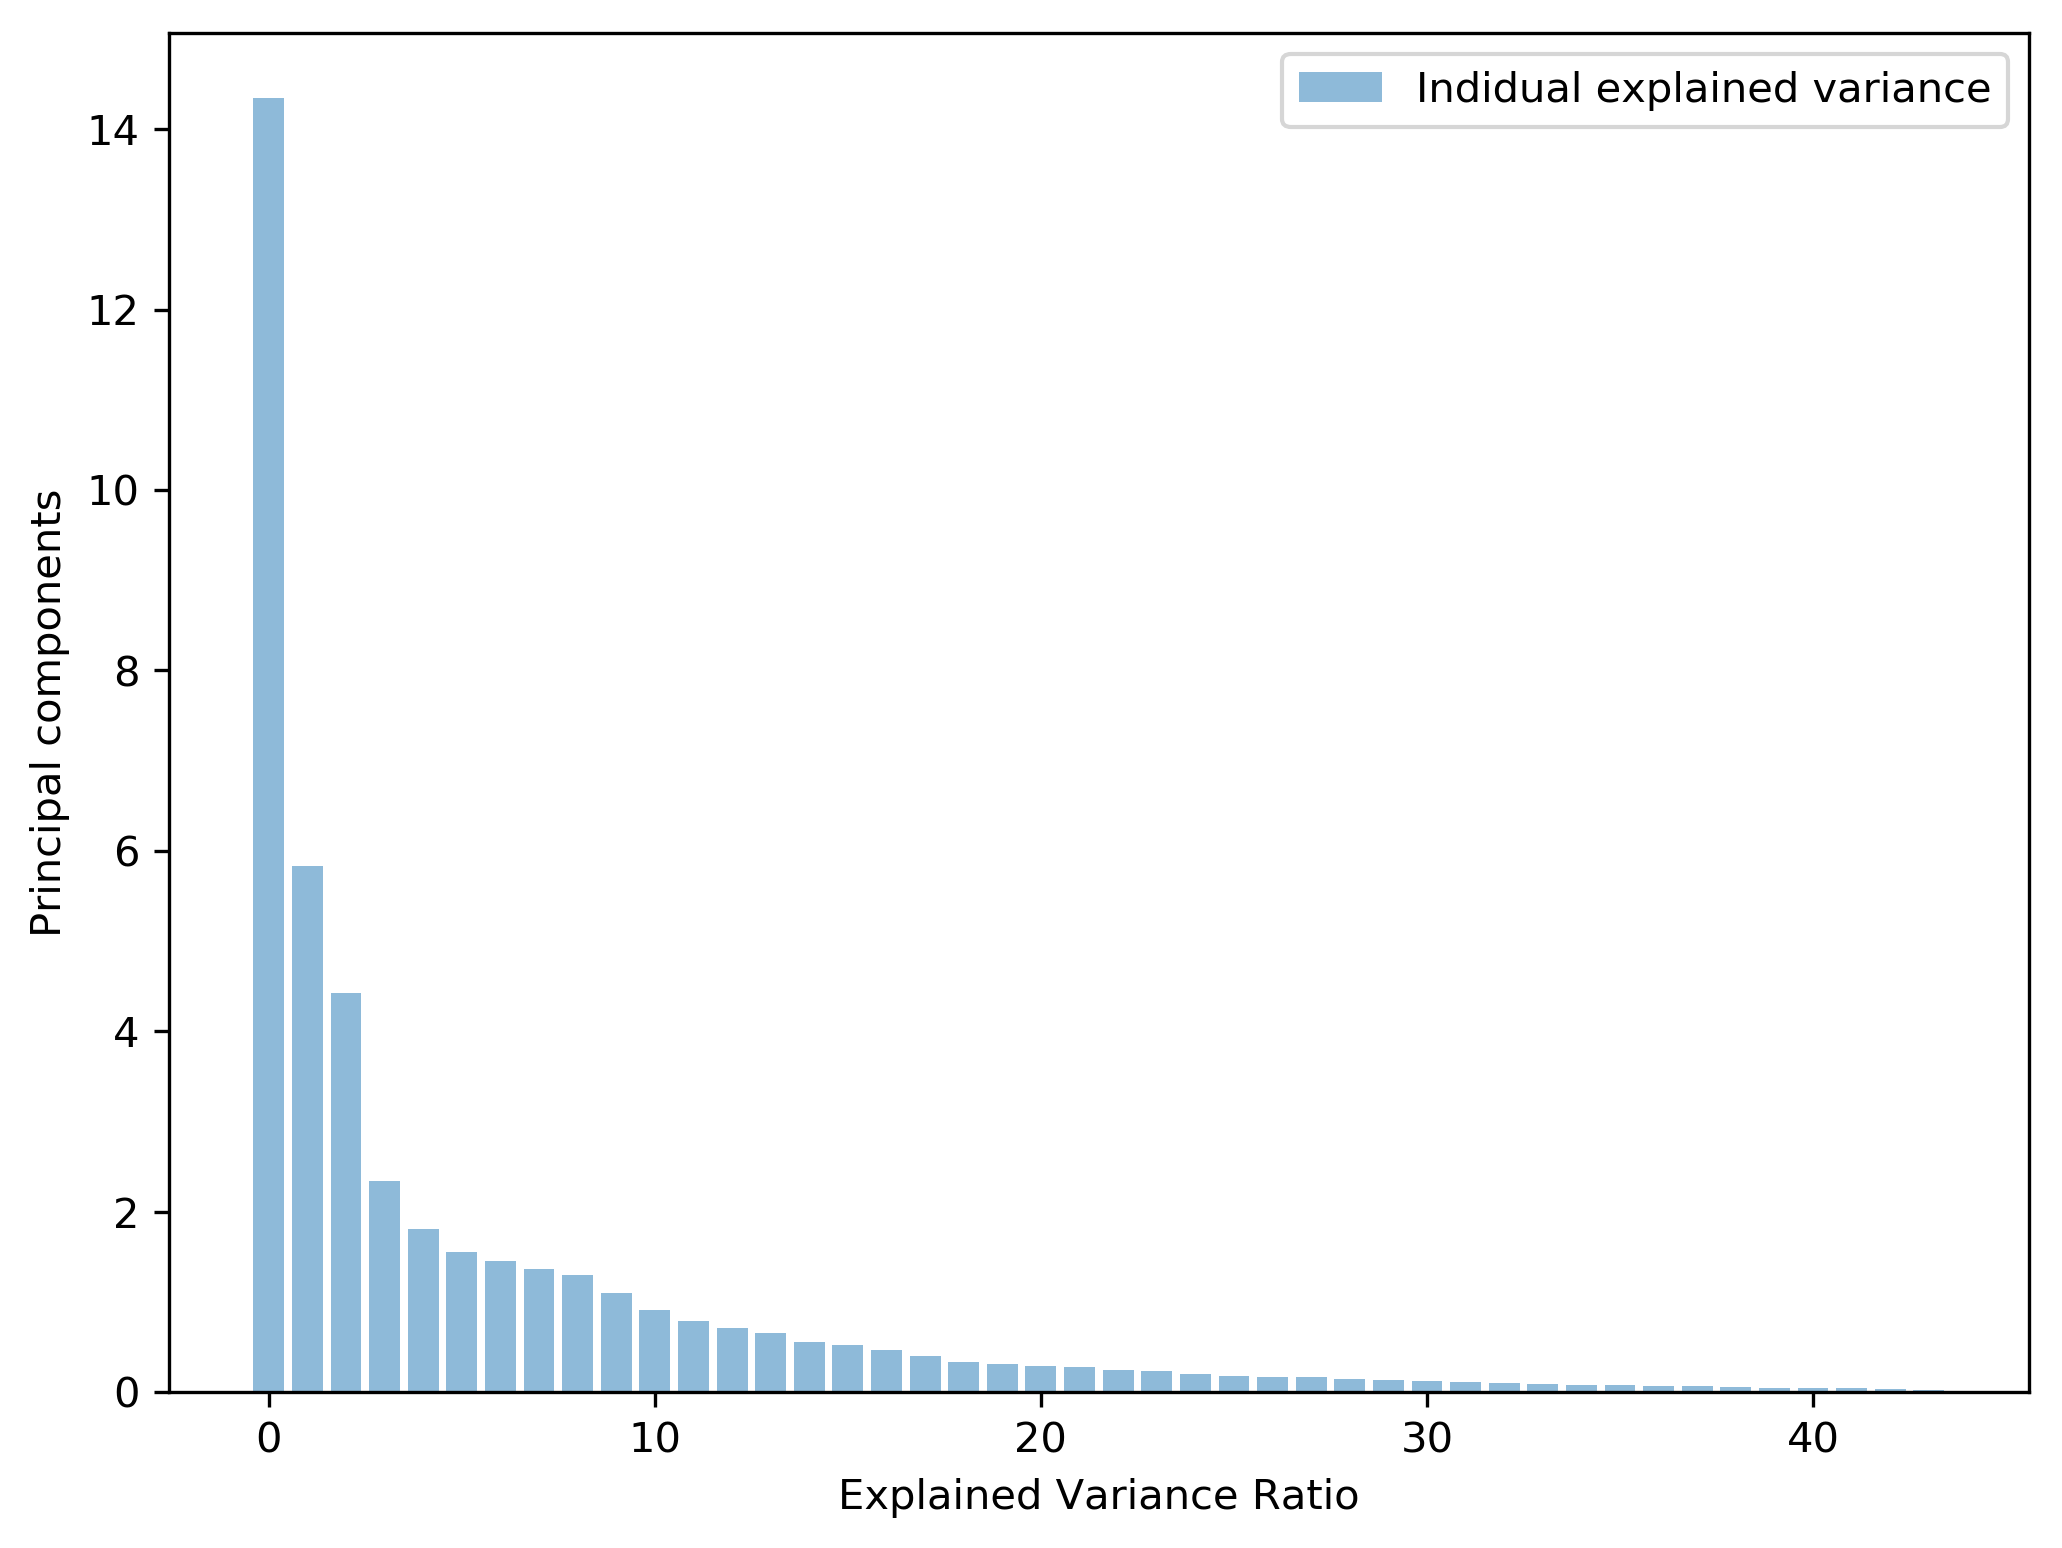

In [8]:
## Barchart 
plt.figure(figsize=(8,6),dpi=300)
plt.bar(range(44),pca.explained_variance_,alpha = .5,label = 'Indidual explained variance')
plt.xlabel('Explained Variance Ratio')
plt.ylabel('Principal components')
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Correlation bewteen PCAed features')

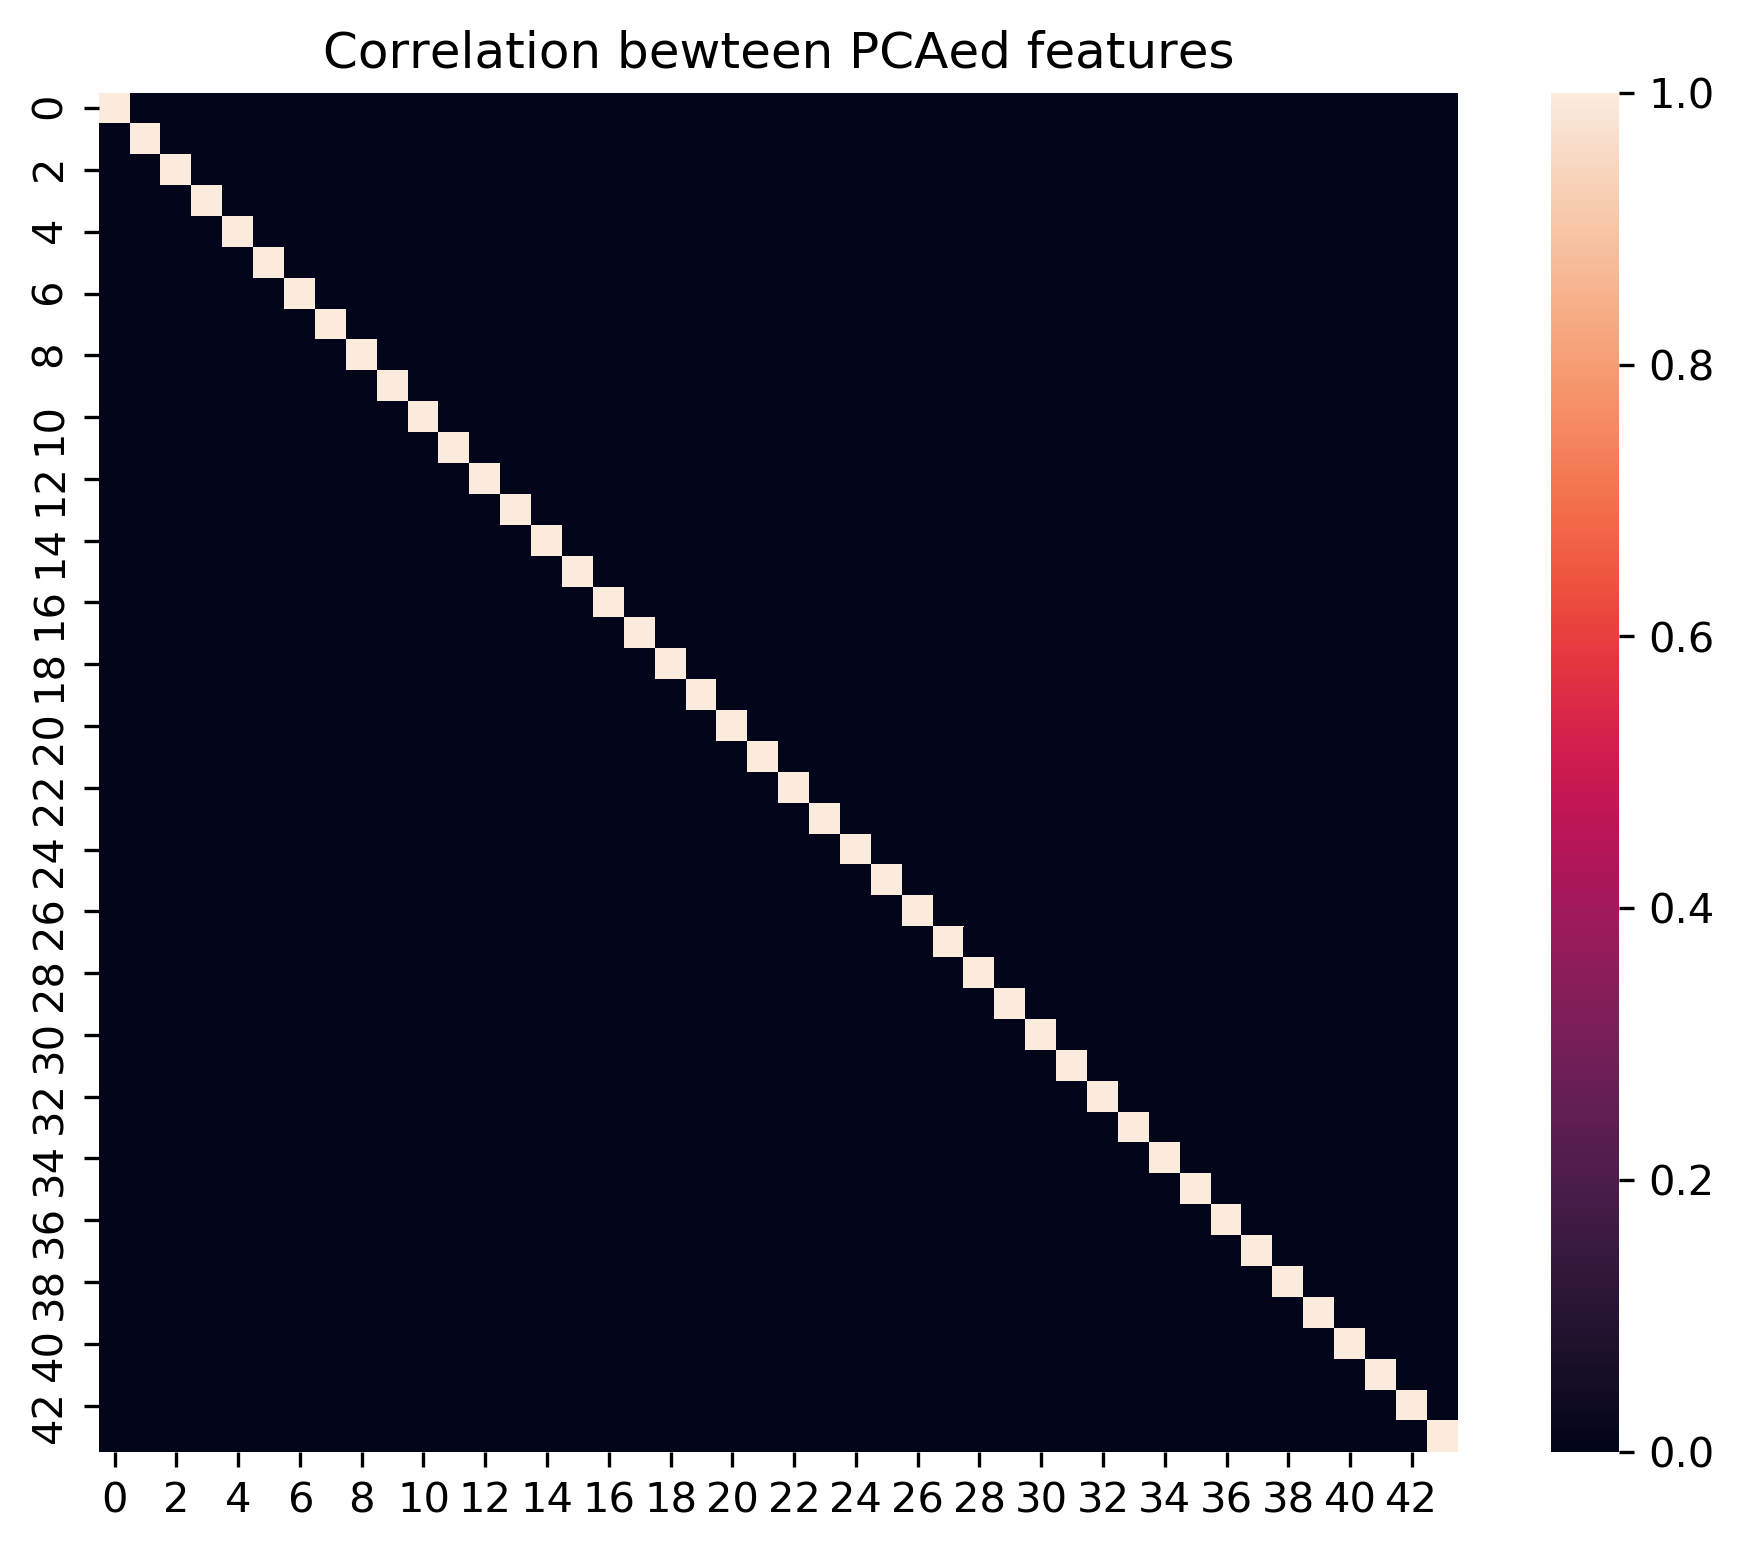

In [27]:
plt.figure(figsize=(8,6),dpi=300)
corr = pd.DataFrame(PCA().fit_transform(X_std)).corr()
sns.heatmap(corr,vmax=1,square = True,)
plt.title('Correlation bewteen PCAed features')

In [49]:
from sklearn.decomposition import TruncatedSVD

In [50]:
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
X_2d = svd.fit_transform(X) 

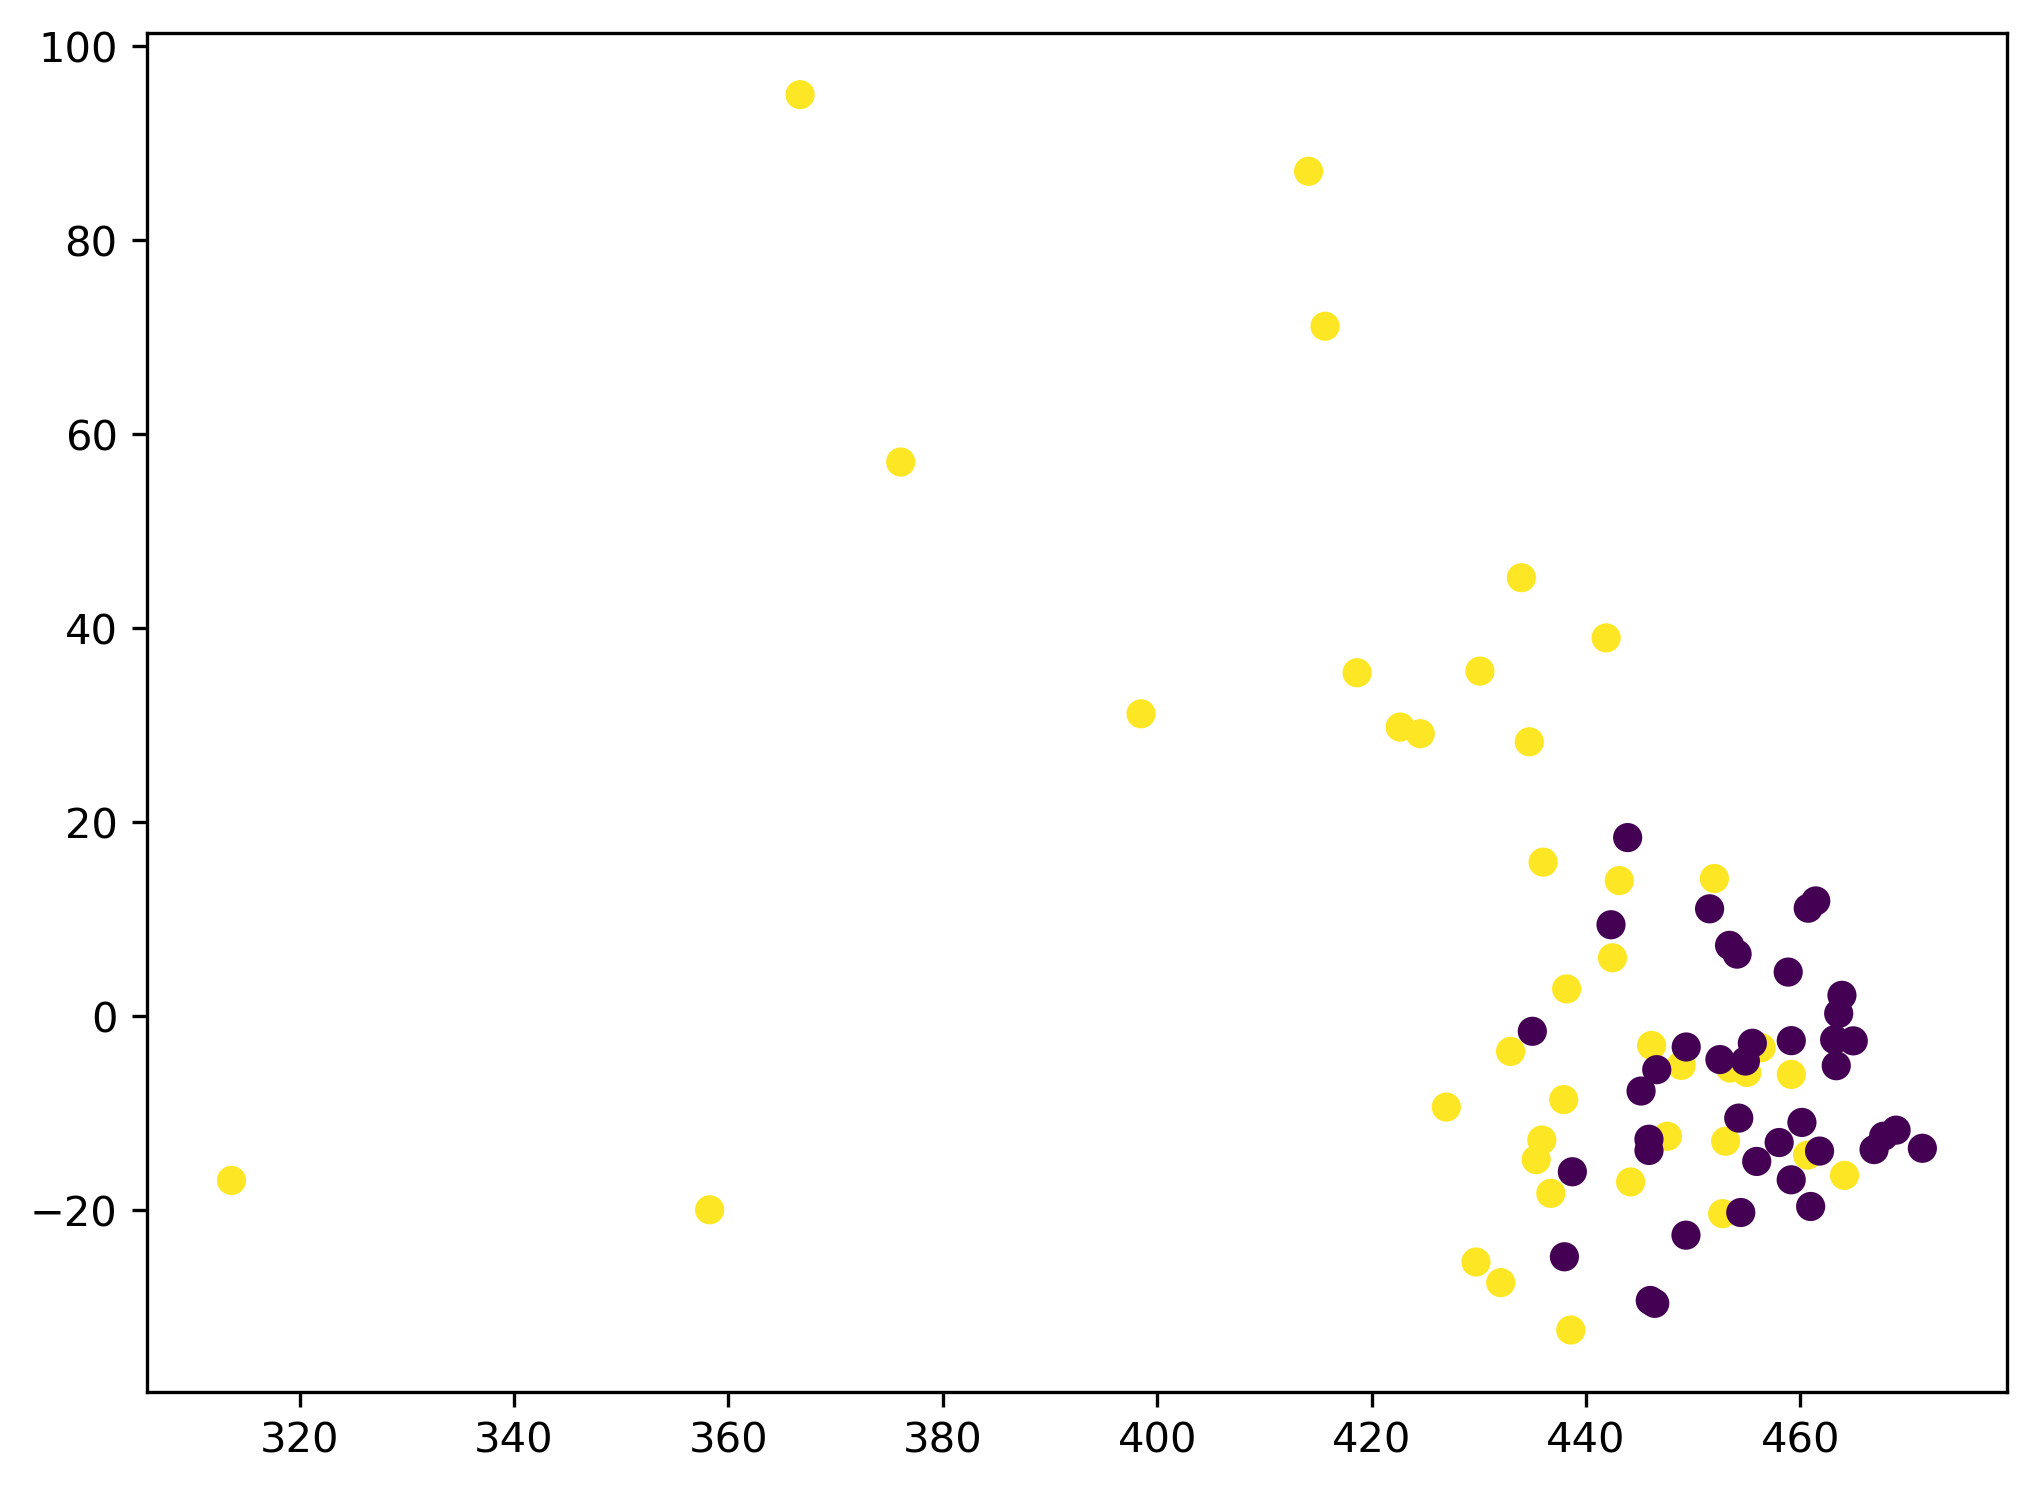

In [51]:
plt.figure(figsize=(8,6),dpi=300)
plt.scatter(X_2d[:,0],X_2d[:,1],c=y)